<a href="https://colab.research.google.com/github/saharshahin/Python_Exploratory_Data_Analysis_-EDA-_on_NYC_Airbnb/blob/main/Python_Exploratory_Data_Analysis_(EDA)_on_NYC_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

**Load The Data**

In [2]:
# The dataset we use is “New York Airbnb Open Data” from Kaggle
# Link >> https://www.kaggle.com/datasets/dgomonov/new-york-city-airbnb-open-data?resource=download
# File Name >> AB_NYC_2019.csv

nyc_df = pd.read_csv('/content/AB_NYC_2019.csv')

**Data Profiling**

In [3]:
# Get the number of rows and columns
row_number,column_number = nyc_df.shape
print(f"Number of rows : {row_number}")
print(f"Number of coiumns : {column_number}")

# Get the number of missing values
num_missing = nyc_df.isnull().sum().sum()
print(f"Number of Missing values : {num_missing}")

# Get columns with missing values
columns_with_missing = nyc_df.columns[nyc_df.isnull().any()].tolist()
print(f"Columns with Missing Values : {columns_with_missing}")


Number of rows : 48895
Number of coiumns : 16
Number of Missing values : 20141
Columns with Missing Values : ['name', 'host_name', 'last_review', 'reviews_per_month']


**Data Cleaning**

In [4]:
# Drop unnecessary columns such as id, name, host_name, last_review
nyc_df.drop(['id', 'name', 'host_name', 'last_review'], axis=1, inplace=True)
print(nyc_df.head())


   host_id neighbourhood_group neighbourhood  latitude  longitude  \
0     2787            Brooklyn    Kensington  40.64749  -73.97237   
1     2845           Manhattan       Midtown  40.75362  -73.98377   
2     4632           Manhattan        Harlem  40.80902  -73.94190   
3     4869            Brooklyn  Clinton Hill  40.68514  -73.95976   
4     7192           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews  \
0     Private room    149               1                  9   
1  Entire home/apt    225               1                 45   
2     Private room    150               3                  0   
3  Entire home/apt     89               1                270   
4  Entire home/apt     80              10                  9   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2  

Replacing all NAN values

In [5]:
# Replacing all NAN values in reviews_per_month column
nyc_df.reviews_per_month.fillna(0, inplace=True)

# Checking if we have any missing values in our data
print(nyc_df.isnull().any())

host_id                           False
neighbourhood_group               False
neighbourhood                     False
latitude                          False
longitude                         False
room_type                         False
price                             False
minimum_nights                    False
number_of_reviews                 False
reviews_per_month                 False
calculated_host_listings_count    False
availability_365                  False
dtype: bool


**Exploration Data and Visualizing**

Neighbourhood Group

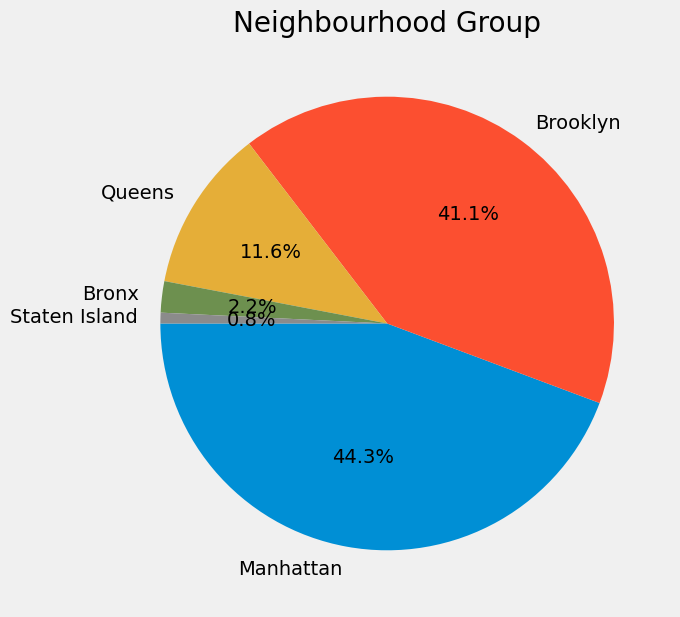

In [6]:
plt.style.use('fivethirtyeight')
plt.figure(figsize= (13,7))
plt.title("Neighbourhood Group")
g= plt.pie(nyc_df.neighbourhood_group.value_counts(), labels= nyc_df.neighbourhood_group.value_counts().index, autopct='%1.1f%%', startangle= 180)
plt.show()

Room Details

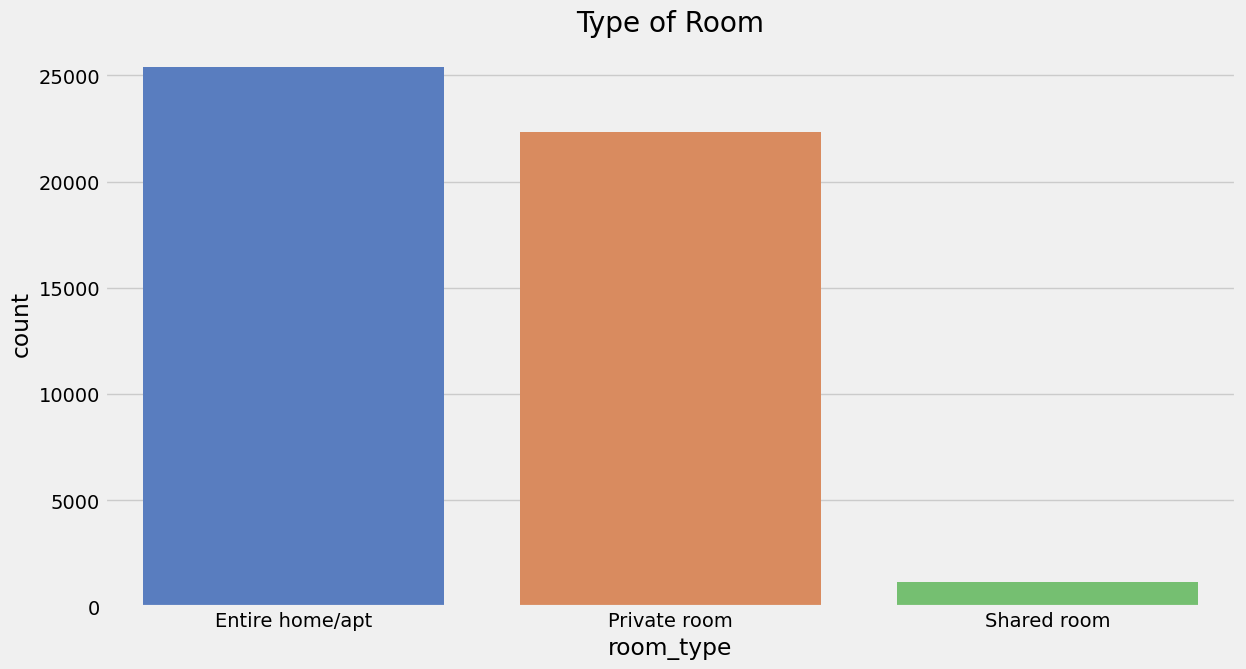

In [7]:
# Convert the 'room_type' column to a categorical data type
nyc_df['room_type'] = nyc_df['room_type'].astype('category')

# Create the countplot using Seaborn
plt.figure(figsize=(13,7))
plt.title("Type of Room")
sns.countplot(x='room_type', data=nyc_df, palette="muted")
fig= plt.gcf()
plt.show()

# plt.figure(figsize=(13,7))
# plt.title("Type of Room")
# sns.countplot(nyc_df.room_type, palette="muted")
# fig= plt.gcf()
# plt.show()

Room Type on Neighbourhood Group

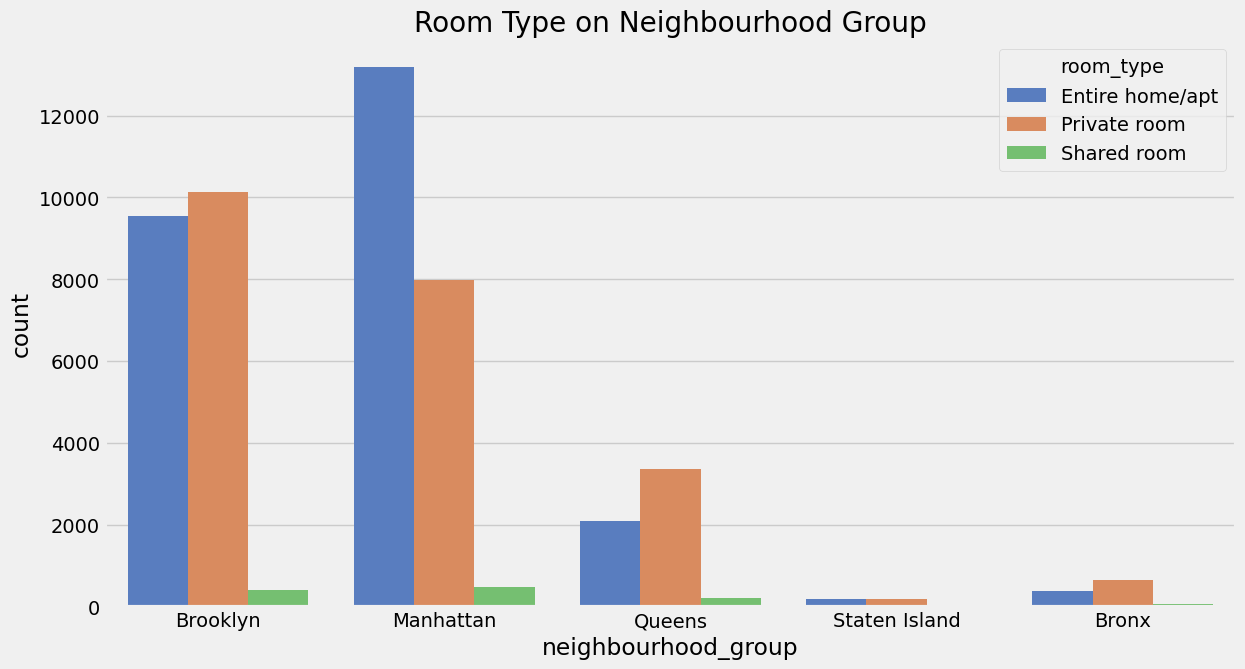

In [8]:
plt.figure(figsize= (13,7))
plt.title("Room Type on Neighbourhood Group")
sns.countplot(x= nyc_df.neighbourhood_group, hue= nyc_df.room_type, palette=("muted"))
plt.show()

 Neighbourhood Group vs. Availability Room

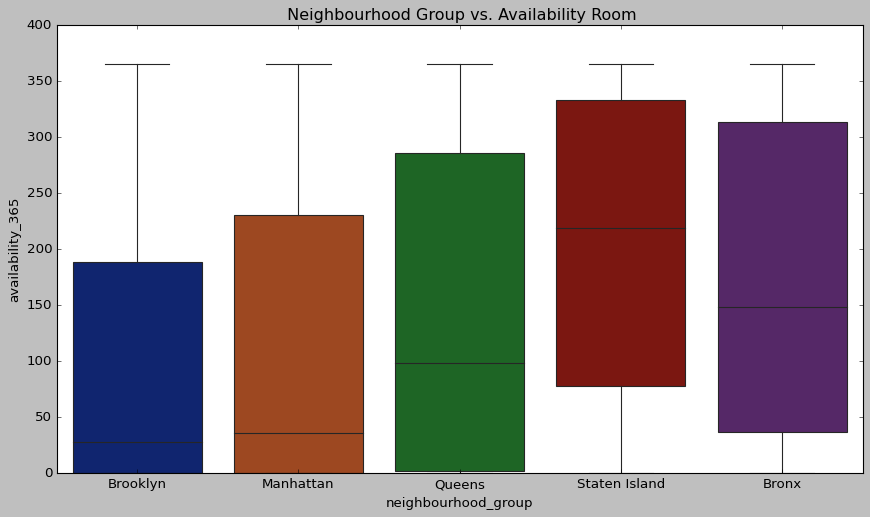

In [9]:
plt.style.use('classic')
plt.figure(figsize= (13,7))
plt.title(" Neighbourhood Group vs. Availability Room")
sns.boxplot(data=nyc_df, x='neighbourhood_group', y='availability_365', palette= "dark")
plt.show()

 Neighbourhood Group Price Distribution

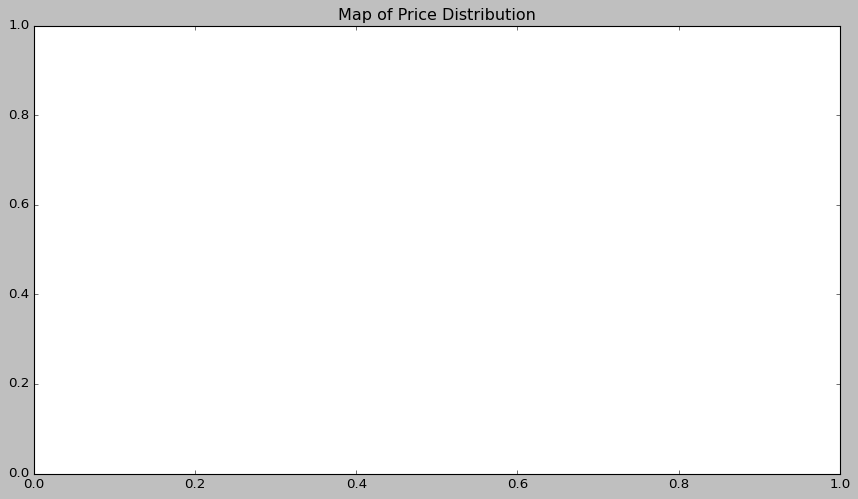

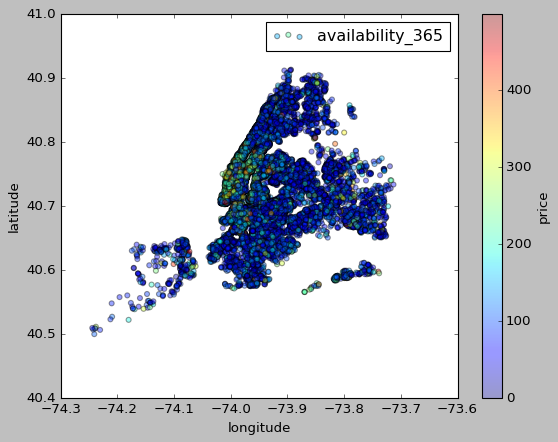

In [10]:
plt.figure(figsize=(13,7))
plt.title("Map of Price Distribution")
ax=nyc_df[nyc_df.price<500].plot(kind='scatter', x='longitude',y='latitude',label='availability_365',c='price',cmap=plt.get_cmap('jet'),colorbar=True,alpha=0.4)
ax.legend()
plt.ioff()
plt.show()

Neighbourhood Group Price Distribution < 500

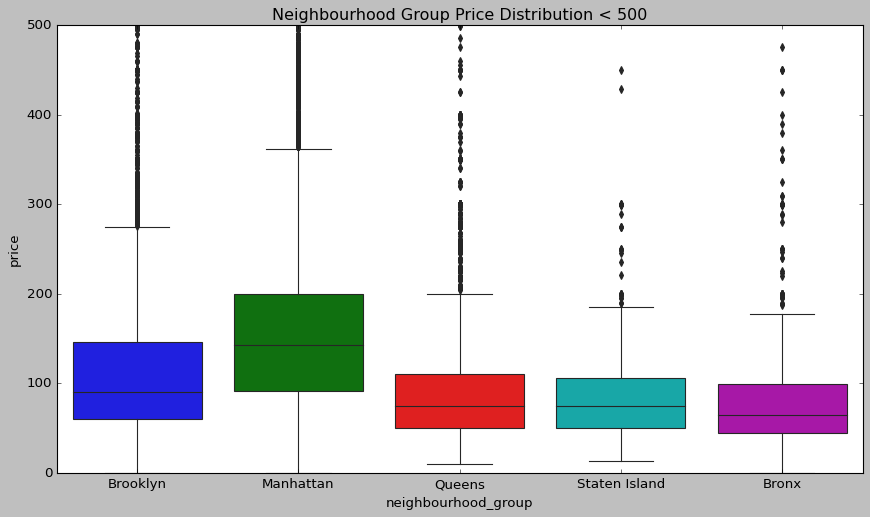

In [11]:
plt.style.use('classic')
plt.figure(figsize=(13,7))
plt.title("Neighbourhood Group Price Distribution < 500")
sns.boxplot(y="price",x ='neighbourhood_group' ,data = nyc_df[nyc_df.price<500])
plt.show()